<a href="https://colab.research.google.com/github/Mitali2303/Probability-Projects-/blob/main/23110206_Probability_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading Iris Dataset

In [ ]:
data = sns.load_dataset(name='iris')

Q1. Estimate the mean and the variance of the four attributes.


In [ ]:
#calculating the mean
def mean(c):
    total = 0
    count = 0
    for i in c:
        total += i
        count += 1
    return total / count

#calculating the variance
def variance(c, mean):
    total_squared_difference = 0
    count = 0
    for i in c:
        total_squared_difference += (i - mean) ** 2
        count += 1
    return total_squared_difference / count

mean_values = {}
variance_values = {}
for column in data.columns[:-1]:  # Excluding the species column
    mean_values[column] = mean(data[column])
    variance_values[column] = variance(data[column], mean_values[column])

print("Mean values of attributes:")
for attr, mean in mean_values.items():
    print(f"{attr}: {mean}")

print("\n\nVariance of attributes:")
for attr, variance in variance_values.items():
    print(f"{attr}: {variance}")


Mean values of attributes:
sepal_length: 5.843333333333335
sepal_width: 3.057333333333334
petal_length: 3.7580000000000027
petal_width: 1.199333333333334


Variance of attributes:
sepal_length: 0.6811222222222222
sepal_width: 0.1887128888888887
petal_length: 3.0955026666666674
petal_width: 0.5771328888888888


In [ ]:
# Calculate the mean and variance of the attributes
means = data.mean()
variances = data.var()

print("Mean of the attributes:")
print(means)

print("\nVariance of the attributes:")
print(variances)


Mean of the attributes:
sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

Variance of the attributes:
sepal_length    0.685694
sepal_width     0.189979
petal_length    3.116278
petal_width     0.581006
dtype: float64


<ipython-input-18-156f43abeb5e>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = data.mean()
<ipython-input-18-156f43abeb5e>:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variances = data.var()


Q2. Arrange the pairs of attributes in the descending order of their correlation coefficients.


In [ ]:
def correlation(x, y):
    n = len(x)

    # Calculate means
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Calculate numerator and denominators
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator_x = np.sqrt(np.sum((x - mean_x)**2))
    denominator_y = np.sqrt(np.sum((y - mean_y)**2))

    # Calculate correlation coefficient
    correlation_coefficient = numerator / (denominator_x * denominator_y)

    return correlation_coefficient

In [ ]:
att1 = data['sepal_length'].values
att2 = data['sepal_width'].values
att3 = data['petal_length'].values
att4 = data['petal_width'].values
arr=[att1,att2,att3,att4]
V=[]
for i in range(4):
  W=[]
  for j in range(4):
    W.append(correlation(arr[i],arr[j]))
  V.append(W)


# Define the data as a dictionary
da= {
    'sepal_length': V[0],
    'sepal_width': V[1],
    'petal_length': V[2],
    'petal_width': V[3]
}

# Create a DataFrame
correlation_df = pd.DataFrame(da, index=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Print the DataFrame
print(correlation_df)


              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


In [ ]:
# Compute the correlation matrix
correlation_matrix = correlation_df

# Stack the correlation matrix to get pairs of attributes and their correlation coefficients
correlation_pairs = correlation_matrix.stack()


# Sort the correlation pairs in descending order of correlation coefficients
sorted_correlation_pairs = correlation_pairs.sort_values(ascending=False)

print("Pairs of attributes arranged in descending order of correlation coefficients:")
print(sorted_correlation_pairs)


Pairs of attributes arranged in descending order of correlation coefficients:
petal_length  petal_length    1.000000
sepal_length  sepal_length    1.000000
sepal_width   sepal_width     1.000000
petal_width   petal_width     1.000000
petal_length  petal_width     0.962865
petal_width   petal_length    0.962865
sepal_length  petal_length    0.871754
petal_length  sepal_length    0.871754
sepal_length  petal_width     0.817941
petal_width   sepal_length    0.817941
sepal_length  sepal_width    -0.117570
sepal_width   sepal_length   -0.117570
              petal_width    -0.366126
petal_width   sepal_width    -0.366126
sepal_width   petal_length   -0.428440
petal_length  sepal_width    -0.428440
dtype: float64


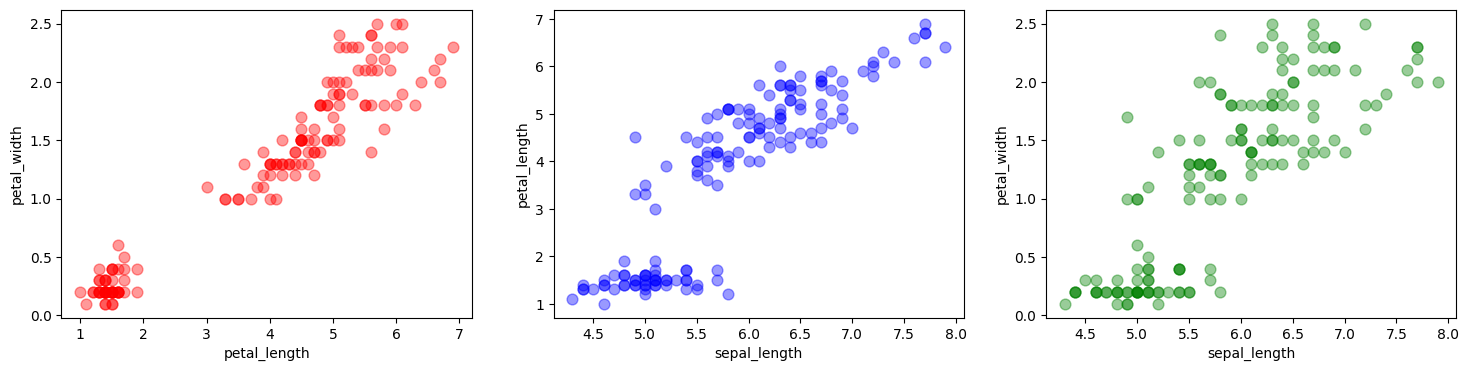

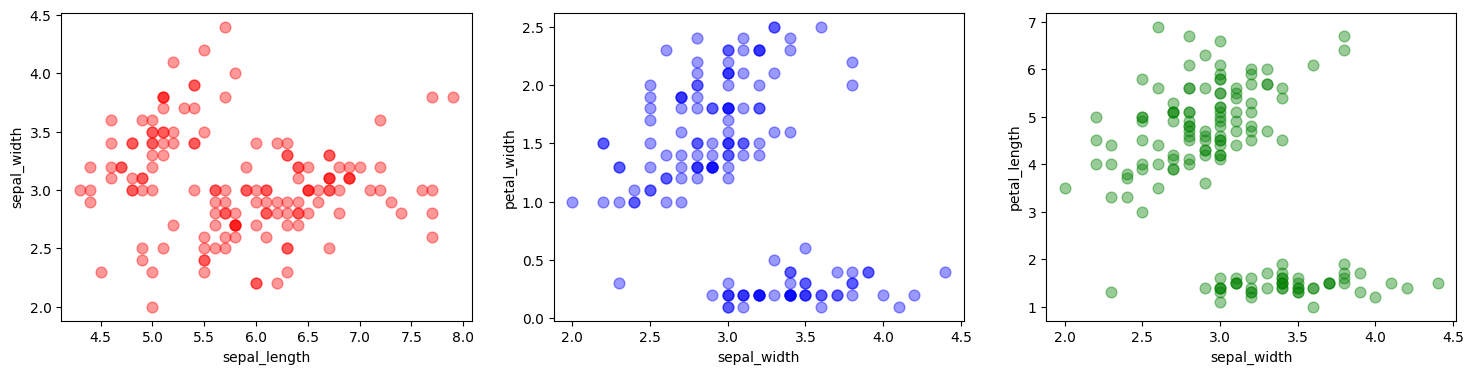

In [ ]:
X = data.iloc[:, :4].to_numpy()
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 2], X[:, 3], c='r', s=60, alpha=0.4)
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 2], c='b', s=60, alpha=0.4)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 3], c='g', s=60, alpha=0.4)
plt.xlabel('sepal_length')
plt.ylabel('petal_width')
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c='r', s=60, alpha=0.4)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.subplot(1, 3, 2)
plt.scatter(X[:, 1], X[:, 3], c='b', s=60, alpha=0.4)
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.subplot(1, 3, 3)
plt.scatter(X[:, 1], X[:, 2], c='g', s=60, alpha=0.4)
plt.xlabel('sepal_width')
plt.ylabel('petal_length')
plt.show()


Q3. Repeat the Question 2 above for the 3 different species separately and report the same.


In [ ]:
X = data[data['species']=='setosa']
Y = data[data['species']=='versicolor']
Z = data[data['species']=='virginica']


In [ ]:
att1 = X['sepal_length'].values
att2 = X['sepal_width'].values
att3 = X['petal_length'].values
att4 = X['petal_width'].values
arr=[att1,att2,att3,att4]
V=[]
for i in range(4):
  W=[]
  for j in range(4):
    W.append(correlation(arr[i],arr[j]))
  V.append(W)


# Define the data as a dictionary
da= {
    'sepal_length': V[0],
    'sepal_width': V[1],
    'petal_length': V[2],
    'petal_width': V[3]
}

# Create a DataFrame
correlation_df = pd.DataFrame(da, index=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Compute the correlation matrix
correlation_matrix = correlation_df

# Stack the correlation matrix to get pairs of attributes and their correlation coefficients
correlation_pairs = correlation_matrix.stack()


# Sort the correlation pairs in descending order of correlation coefficients
sorted_correlation_pairs = correlation_pairs.sort_values(ascending=False)

print("Pairs of attributes arranged in descending order of correlation coefficients for setosa spicies:")
print(sorted_correlation_pairs)


Pairs of attributes arranged in descending order of correlation coefficients:
petal_width   petal_width     1.000000
sepal_length  sepal_length    1.000000
sepal_width   sepal_width     1.000000
petal_length  petal_length    1.000000
sepal_length  sepal_width     0.742547
sepal_width   sepal_length    0.742547
petal_length  petal_width     0.331630
petal_width   petal_length    0.331630
sepal_length  petal_width     0.278098
petal_width   sepal_length    0.278098
sepal_length  petal_length    0.267176
petal_length  sepal_length    0.267176
sepal_width   petal_width     0.232752
petal_width   sepal_width     0.232752
sepal_width   petal_length    0.177700
petal_length  sepal_width     0.177700
dtype: float64


Setosa Graphs :


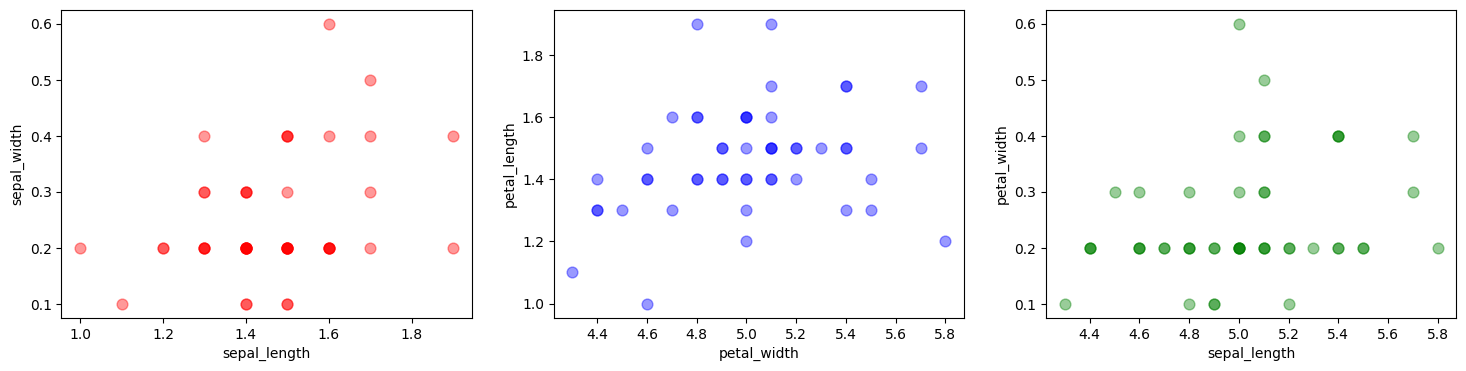

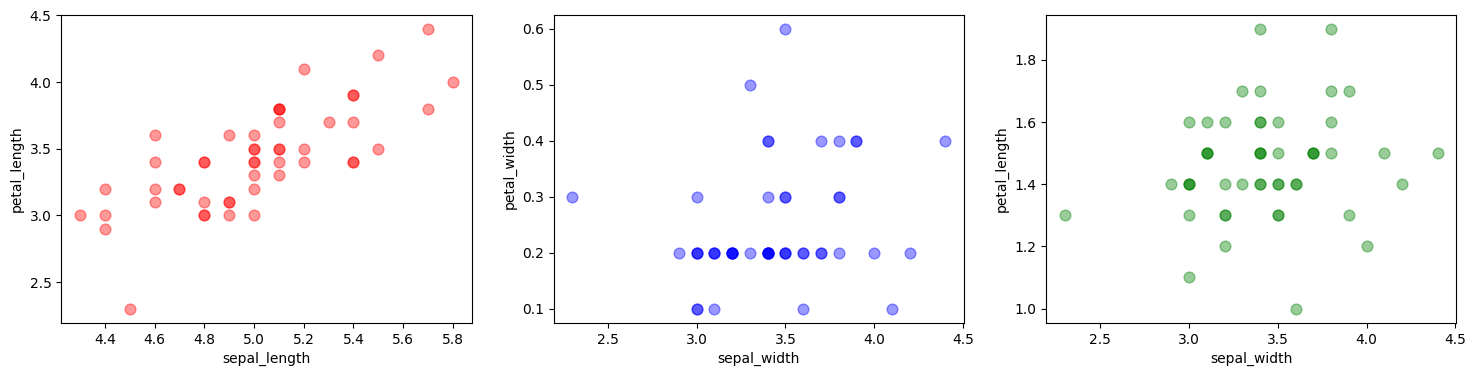

In [ ]:
X=data[data['species']=='setosa'].iloc[:, :4].to_numpy()
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 2], X[:, 3], c='r', s=60, alpha=0.4)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 2], c='b', s=60, alpha=0.4)
plt.xlabel('petal_width')
plt.ylabel('petal_length')
plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 3], c='g', s=60, alpha=0.4)
plt.xlabel('sepal_length')
plt.ylabel('petal_width')
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c='r', s=60, alpha=0.4)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.subplot(1, 3, 2)
plt.scatter(X[:, 1], X[:, 3], c='b', s=60, alpha=0.4)
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.subplot(1, 3, 3)
plt.scatter(X[:, 1], X[:, 2], c='g', s=60, alpha=0.4)
plt.xlabel('sepal_width')
plt.ylabel('petal_length')
print('Setosa Graphs :')
plt.show()

In [ ]:
att1 = Y['sepal_length'].values
att2 = Y['sepal_width'].values
att3 = Y['petal_length'].values
att4 = Y['petal_width'].values
arr=[att1,att2,att3,att4]
V=[]
for i in range(4):
  W=[]
  for j in range(4):
    W.append(correlation(arr[i],arr[j]))
  V.append(W)


# Define the data as a dictionary
da= {
    'sepal_length': V[0],
    'sepal_width': V[1],
    'petal_length': V[2],
    'petal_width': V[3]
}

# Create a DataFrame
correlation_df = pd.DataFrame(da, index=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Compute the correlation matrix
correlation_matrix = correlation_df

# Stack the correlation matrix to get pairs of attributes and their correlation coefficients
correlation_pairs = correlation_matrix.stack()


# Sort the correlation pairs in descending order of correlation coefficients
sorted_correlation_pairs = correlation_pairs.sort_values(ascending=False)

print("Pairs of attributes arranged in descending order of correlation coefficients for versicolor speicies:")
print(sorted_correlation_pairs)


Pairs of attributes arranged in descending order of correlation coefficients:
sepal_width   sepal_width     1.000000
petal_length  petal_length    1.000000
petal_width   petal_width     1.000000
sepal_length  sepal_length    1.000000
petal_length  petal_width     0.786668
petal_width   petal_length    0.786668
sepal_length  petal_length    0.754049
petal_length  sepal_length    0.754049
sepal_width   petal_width     0.663999
petal_width   sepal_width     0.663999
sepal_width   petal_length    0.560522
petal_length  sepal_width     0.560522
sepal_length  petal_width     0.546461
petal_width   sepal_length    0.546461
sepal_length  sepal_width     0.525911
sepal_width   sepal_length    0.525911
dtype: float64


In [ ]:
att1 = Z['sepal_length'].values
att2 = Z['sepal_width'].values
att3 = Z['petal_length'].values
att4 = Z['petal_width'].values
arr=[att1,att2,att3,att4]
V=[]
for i in range(4):
  W=[]
  for j in range(4):
    W.append(correlation(arr[i],arr[j]))
  V.append(W)


# Define the data as a dictionary
da= {
    'sepal_length': V[0],
    'sepal_width': V[1],
    'petal_length': V[2],
    'petal_width': V[3]
}

# Create a DataFrame
correlation_df = pd.DataFrame(da, index=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

# Compute the correlation matrix
correlation_matrix = correlation_df

# Stack the correlation matrix to get pairs of attributes and their correlation coefficients
correlation_pairs = correlation_matrix.stack()


# Sort the correlation pairs in descending order of correlation coefficients
sorted_correlation_pairs = correlation_pairs.sort_values(ascending=False)

print("Pairs of attributes arranged in descending order of correlation coefficients for virginica spiecies:")
print(sorted_correlation_pairs)


Pairs of attributes arranged in descending order of correlation coefficients:
sepal_width   sepal_width     1.000000
petal_length  petal_length    1.000000
petal_width   petal_width     1.000000
sepal_length  sepal_length    1.000000
              petal_length    0.864225
petal_length  sepal_length    0.864225
sepal_width   petal_width     0.537728
petal_width   sepal_width     0.537728
sepal_length  sepal_width     0.457228
sepal_width   sepal_length    0.457228
              petal_length    0.401045
petal_length  sepal_width     0.401045
              petal_width     0.322108
petal_width   petal_length    0.322108
sepal_length  petal_width     0.281108
petal_width   sepal_length    0.281108
dtype: float64
